# Spacecreaft anomalies

## Planteamiento del problema

El dataset tiene registros que incluyen fecha, hora, ubicación, entre otras, relacionado con los incidentes de irregularidades operativas en las naves, debido a el entorno natural. 


 



## Descripción de datos

Los datos en el archivo [¨anom5j.xls¨](https://www.ngdc.noaa.gov/stp/satellite/anomaly/doc/anom5j.xls) contiene los registros de las anomalias, las definiciones de las columnas, en su formato'Version 5 / Sptember 2, 1988', son los siguientes:

| Columna | Nombre |  Descripcion |
| -- | ---      | --- |
| 1  | VER      | Version |
| 2  | EDATE    | Fecha |
| 3  | BIRD     | Identificador del satelite | 
| 4  | ADATE    | Fecha en que ocurre la anomlía | 
| 5  | STIMEU   | Tiempo en que inicia anomalía, 9999 = no time -UT| 
| 6  | STIMEQ   | Incertidumbre en el tiempo (Minutos) | 
| 7  | DUR      | Duración (Minutos)| 
| 8  | STIMEL   | Tiempo en que inicia anomaliá en hora local| 
| 9  | ORBIT    | Orbita|  
| 10 | NS       | N= Norte, S= Sur de la latitud, Vacio => no Lat.| 
| 11 | LAT      | Latitud geográfica del punto suborbitario al inicio de la anomalía| 
| 12 | LATQ     | Incertidumbre en latitud (grados)| 
| 13 | EW       | E= Este, W= Oeste de la longitud, Vacio => no Lon. | 
| 14 | LON      | Longitud geográfica del punto suborbitario al inicio de la anomalía. | 
| 15 | LONQ     | Incertidumbre en longitud (grados) | 
| 16 | ALT      | Altitud (kilómetros) | 
| 17 | ATYPE    | Tipo de anomalía |
| 18 | ADIAG    | Diagnóstico de anomalías | 
| 19 | ACOMMENT | Comentario relacionado con la anomalía |
| 20 | SVE      | Ángulo Sol-Vehículo-Tierra en grados. | 
| 21 | SPIN     | S = giro estabilizado, A = 3 ejes estabilizado. |  




In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns


In [175]:
df = pd.read_excel("https://www.ngdc.noaa.gov/stp/satellite/anomaly/doc/anom5j.xls")
df.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,VER,EDATE,BIRD,ADATE,STIMEU,STIMEQ,DUR,STIMEL,ORBIT,NS,LAT,LATQ,EW,LON,LONQ,ALT,ATYPE,ADIAG,ACOMMENT,SVE,SPIN
0,5.0,1994-01-19,AFSATCOM,1990-09-11,2000,NaN,0,1632.0,G,NaN,0,NaN,E,308,NaN,35784,UNK,UNK,SFC(129) Decoder problem.,0.0,NaN
1,5.0,1994-01-19,AFTAC/WE,1992-04-15,838,NaN,0,2138.0,G,NaN,0,NaN,E,195,NaN,35784,UNK,UNK,SFC(116) Temperature sensor failure. / AP=QUIE...,0.0,NaN
2,5.0,1994-01-19,AMPTE/CCE,1987-10-27,1408,NaN,0,120.0,E,N,5,NaN,E,168,NaN,54810,UNK,UNK,SFC(118) Power supply problem.,0.0,NaN
3,5.0,1986-12-11,@PN0101,1978-10-04,1915,0.0,0,1219.0,G,N,0,0.0,W,104,0.0,35784,PC,ESD,ENCODER 2 MODE SWITCH,0.0,NaN
4,5.0,1986-12-11,@PN0102,1974-06-15,338,0.0,0,2042.0,G,N,0,0.0,W,104,0.0,35784,PC,ESD,ENCODER 2 MODE SWITCH - SENSOR TO PAM,0.0,NaN


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   VER       5032 non-null   float64       
 1   EDATE     5033 non-null   datetime64[ns]
 2   BIRD      5033 non-null   object        
 3   ADATE     5033 non-null   datetime64[ns]
 4   STIMEU    5033 non-null   int64         
 5   STIMEQ    4150 non-null   float64       
 6   DUR       5033 non-null   int64         
 7   STIMEL    3508 non-null   float64       
 8   ORBIT     4577 non-null   object        
 9   NS        2999 non-null   object        
 10  LAT       5033 non-null   int64         
 11  LATQ      4150 non-null   float64       
 12  EW        3672 non-null   object        
 13  LON       5033 non-null   int64         
 14  LONQ      4150 non-null   float64       
 15  ALT       5033 non-null   int64         
 16  ATYPE     4984 non-null   object        
 17  ADIAG     4986

In [177]:
df.isnull().sum()

VER            1
EDATE          0
BIRD           0
ADATE          0
STIMEU         0
STIMEQ       883
DUR            0
STIMEL      1525
ORBIT        456
NS          2034
LAT            0
LATQ         883
EW          1361
LON            0
LONQ         883
ALT            0
ATYPE         49
ADIAG         47
ACOMMENT    1393
SVE          354
SPIN        4717
dtype: int64

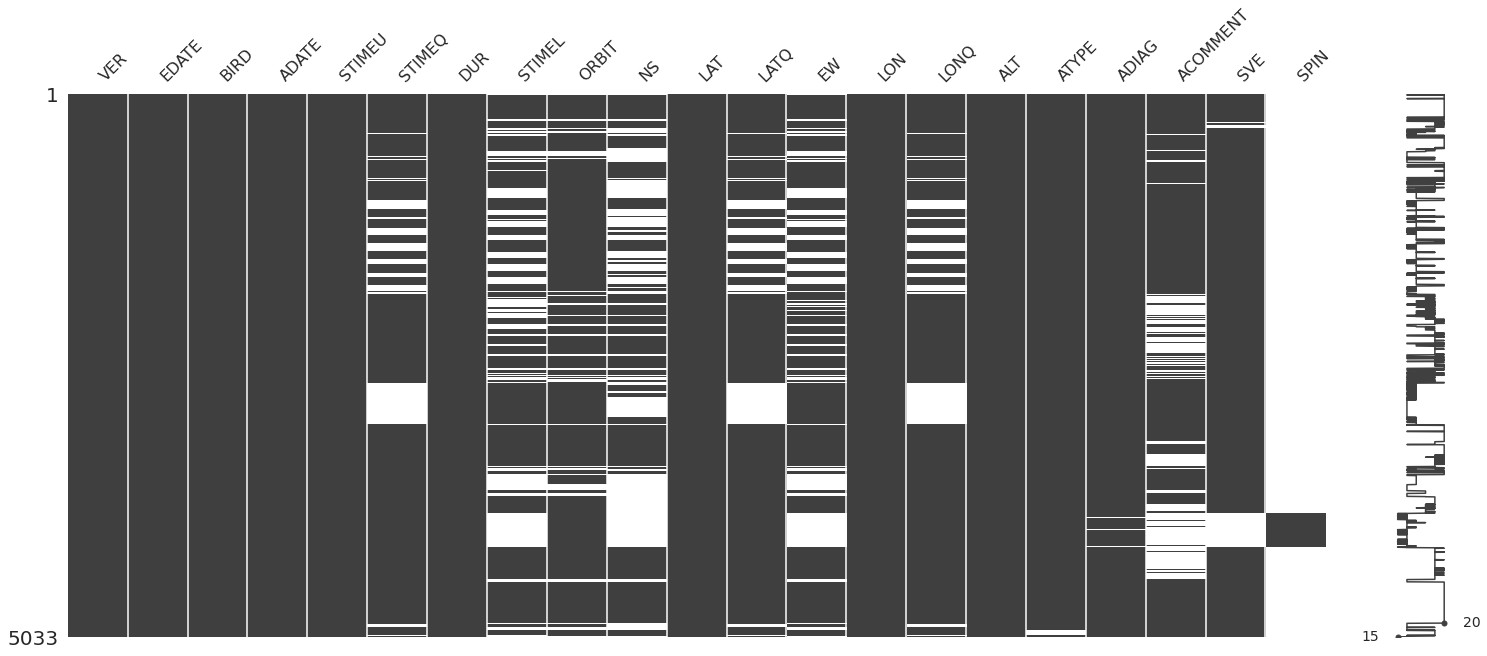

In [178]:
msno.matrix(df)

## Selección de columnas

In [179]:
df_min=df[["BIRD", "ADATE", "STIMEU", "ORBIT", "LAT", "LON", "ATYPE", "ADIAG"]] 
df_min

,BIRD,ADATE,STIMEU,ORBIT,LAT,LON,ATYPE,ADIAG
0,AFSATCOM,1990-09-11,2000,G,0,308,UNK,UNK
1,AFTAC/WE,1992-04-15,838,G,0,195,UNK,UNK
2,AMPTE/CCE,1987-10-27,1408,E,5,168,UNK,UNK
3,@PN0101,1978-10-04,1915,G,0,104,PC,ESD
4,@PN0102,1974-06-15,338,G,0,104,PC,ESD
...,...,...,...,...,...,...,...,...
5028,WESTAR-4,1982-02-25,9999,NaN,0,0,UNK,UNK
5029,WESTAR-4,1982-02-25,9999,NaN,0,0,UNK,UNK
5030,WESTAR-5,1982-06-09,9999,NaN,0,0,UNK,UNK
5031,WESTAR-5,1987-10-14,1750,G,0,238,UNK,UNK


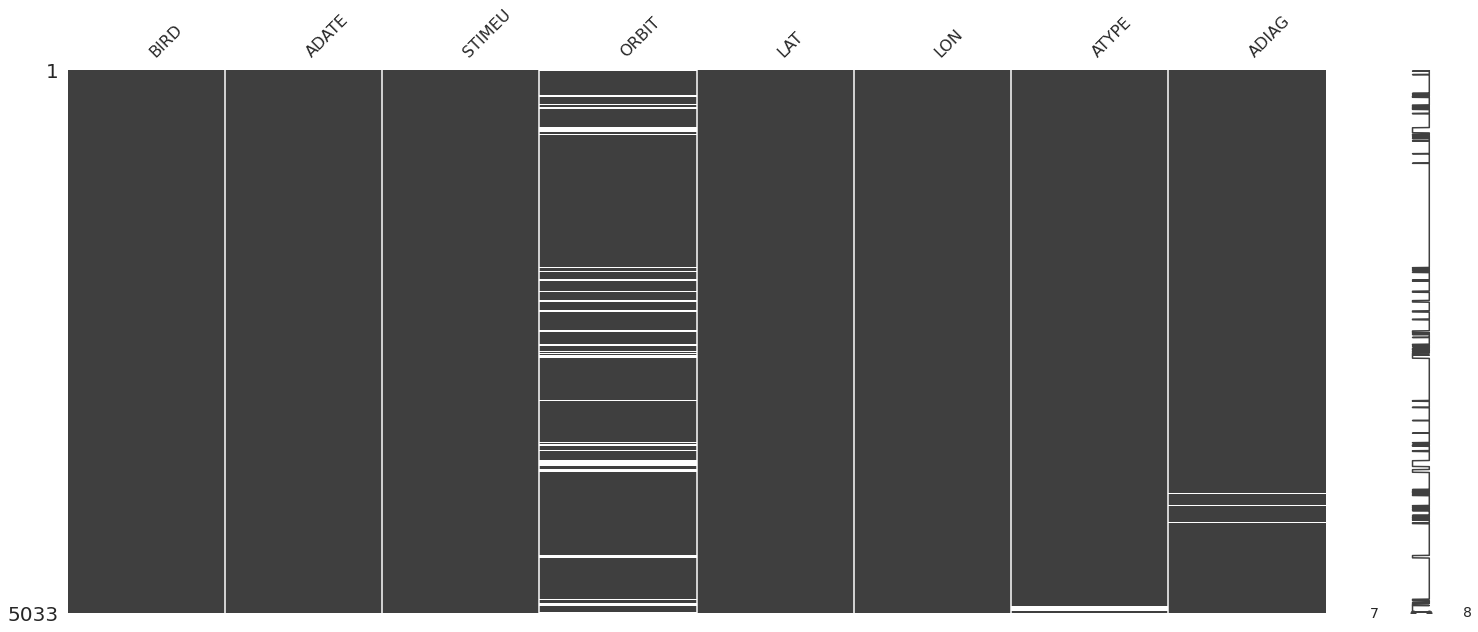

In [180]:
msno.matrix(df_min)

### Esta relacionado la hora del dia con la ocurreccia de anomalias?


In [181]:
df_minT=df_min[(df_min["STIMEU"]!=9999) & (df_min["STIMEU"].notna())]
df_minT

,BIRD,ADATE,STIMEU,ORBIT,LAT,LON,ATYPE,ADIAG
0,AFSATCOM,1990-09-11,2000,G,0,308,UNK,UNK
1,AFTAC/WE,1992-04-15,838,G,0,195,UNK,UNK
2,AMPTE/CCE,1987-10-27,1408,E,5,168,UNK,UNK
3,@PN0101,1978-10-04,1915,G,0,104,PC,ESD
4,@PN0102,1974-06-15,338,G,0,104,PC,ESD
...,...,...,...,...,...,...,...,...
5016,TOPEX,1992-09-16,1432,P,31,308,NaN,SEU
5017,TOPEX,1992-09-16,1435,P,22,312,NaN,SEU
5018,TOPEX,1992-09-16,1442,P,2,320,NaN,SEU
5019,TRW,1991-06-23,447,E,25,307,PC,UNK


In [182]:
df_minH=df_minT.copy()
df_minH["Hora"]=df_minT.loc[:,"STIMEU"].apply(lambda x: int(x/100))
df_minH.head()

,BIRD,ADATE,STIMEU,ORBIT,LAT,LON,ATYPE,ADIAG,Hora
0,AFSATCOM,1990-09-11,2000,G,0,308,UNK,UNK,20
1,AFTAC/WE,1992-04-15,838,G,0,195,UNK,UNK,8
2,AMPTE/CCE,1987-10-27,1408,E,5,168,UNK,UNK,14
3,@PN0101,1978-10-04,1915,G,0,104,PC,ESD,19
4,@PN0102,1974-06-15,338,G,0,104,PC,ESD,3


In [183]:
anomaliesH=df_minH.groupby(["Hora", "ATYPE"]).agg({"BIRD": "count"}).reset_index().rename(columns={"BIRD":"TOTAL"})
anomaliesH

,Hora,ATYPE,TOTAL
0,0,ESDM,46
1,0,PC,36
2,0,PF,10
3,0,SE,81
4,0,SS,1
...,...,...,...
166,23,PC,34
167,23,PF,1
168,23,SE,91
169,23,TE,21


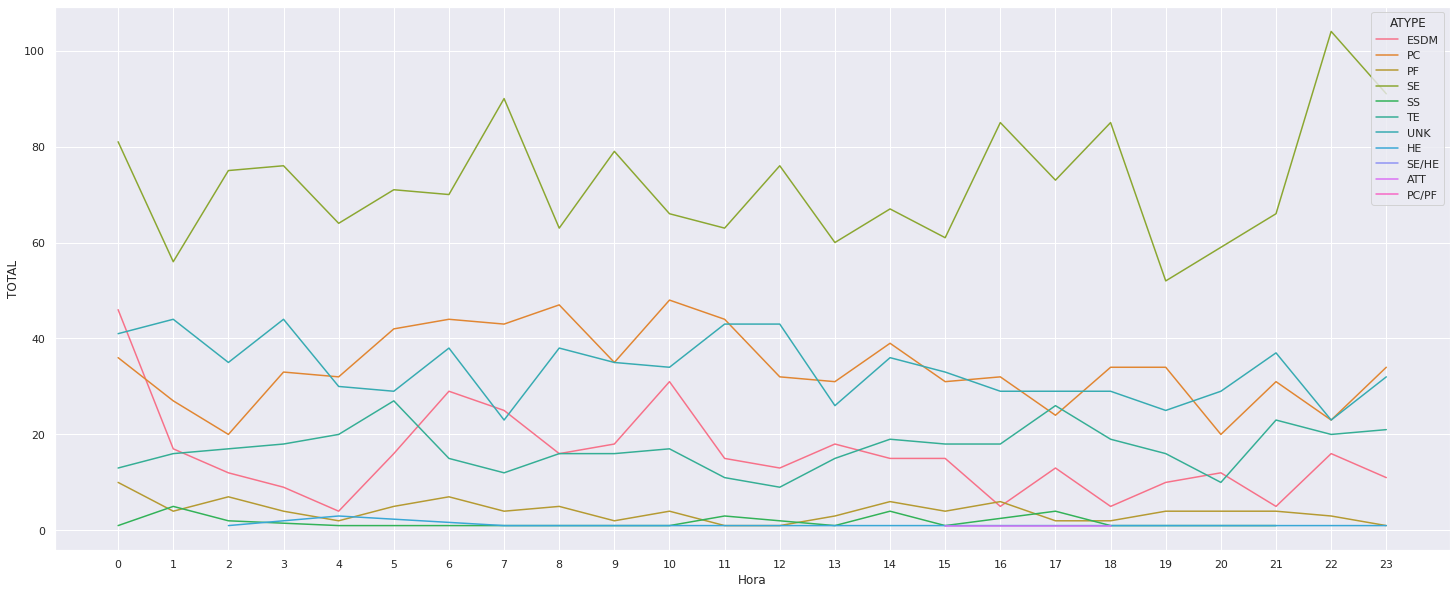

In [184]:
sns.set(rc={"figure.figsize":(25,10)})
ax=sns.lineplot(data=anomaliesH, x="Hora", y="TOTAL", hue="ATYPE")
ax.set(xticks=anomaliesH.Hora.unique())
plt.show()

### Esta relacionado el mes  con la ocurreccia de anomalias?




In [185]:
anomaliesM=df_min.groupby([df_min.ADATE.dt.month, "ATYPE"]).agg({"BIRD": "count"}).reset_index().rename(columns={"BIRD":"TOTAL"})
anomaliesM

,ADATE,ATYPE,TOTAL
0,1,ESDM,6
1,1,HE,1
2,1,PC,42
3,1,PF,9
4,1,SE,153
...,...,...,...
88,12,SE,107
89,12,SE/HE,1
90,12,SS,3
91,12,TE,6


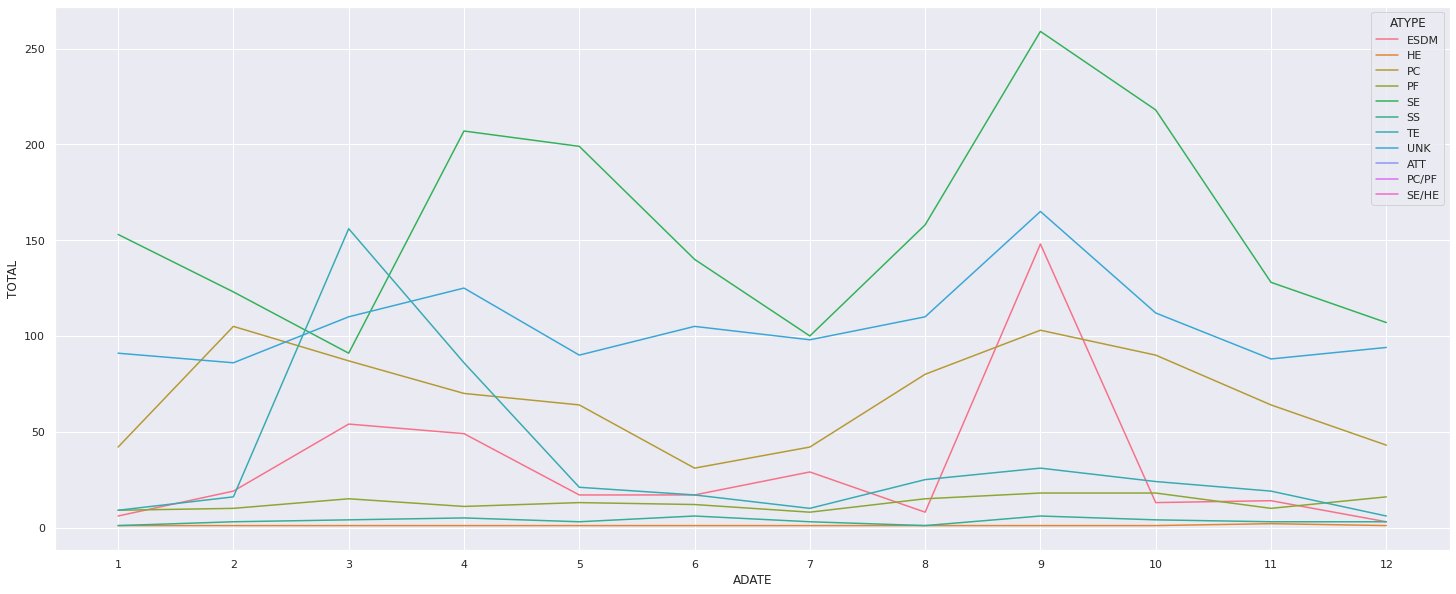

In [186]:
sns.set(rc={"figure.figsize":(25,10)})
ax=sns.lineplot(data=anomaliesM, x="ADATE", y="TOTAL", hue="ATYPE")
ax.set(xticks=anomaliesM.ADATE.unique())
plt.show()

### Anomalias por órbita

In [187]:
df_orbit=df_min[df_min['ORBIT'].notna()]
df_orbit

,BIRD,ADATE,STIMEU,ORBIT,LAT,LON,ATYPE,ADIAG
0,AFSATCOM,1990-09-11,2000,G,0,308,UNK,UNK
1,AFTAC/WE,1992-04-15,838,G,0,195,UNK,UNK
2,AMPTE/CCE,1987-10-27,1408,E,5,168,UNK,UNK
3,@PN0101,1978-10-04,1915,G,0,104,PC,ESD
4,@PN0102,1974-06-15,338,G,0,104,PC,ESD
...,...,...,...,...,...,...,...,...
5016,TOPEX,1992-09-16,1432,P,31,308,NaN,SEU
5017,TOPEX,1992-09-16,1435,P,22,312,NaN,SEU
5018,TOPEX,1992-09-16,1442,P,2,320,NaN,SEU
5019,TRW,1991-06-23,447,E,25,307,PC,UNK


In [188]:
df_orbit[df_orbit["ORBIT"]=="V"]

,BIRD,ADATE,STIMEU,ORBIT,LAT,LON,ATYPE,ADIAG
3535,PIONEER-12,1978-06-22,9999,V,0,0,SE,SEU
3536,PIONEER-12,1978-07-05,9999,V,0,0,SE,SEU
3537,PIONEER-12,1978-07-18,9999,V,0,0,SE,SEU
3538,PIONEER-12,1978-08-02,9999,V,0,0,SE,SEU
3539,PIONEER-12,1978-08-25,9999,V,0,0,SE,SEU
...,...,...,...,...,...,...,...,...
3614,PIONEER-12,1985-04-21,9999,V,0,0,SE,SEU
3615,PIONEER-12,1985-05-20,9999,V,0,0,SE,SEU
3616,PIONEER-12,1985-06-17,9999,V,0,0,SE,SEU
3617,PIONEER-12,1985-06-17,9999,V,0,0,SE,SEU


In [189]:
anomaliesOrbit=df_min[["ORBIT", "ADATE"]].groupby(by=["ORBIT"]).count()
anomaliesOrbit

,ADATE
ORBIT,
C,741
D,1
E,326
G,2678
I,564
M,1
P,129
S,52
V,84


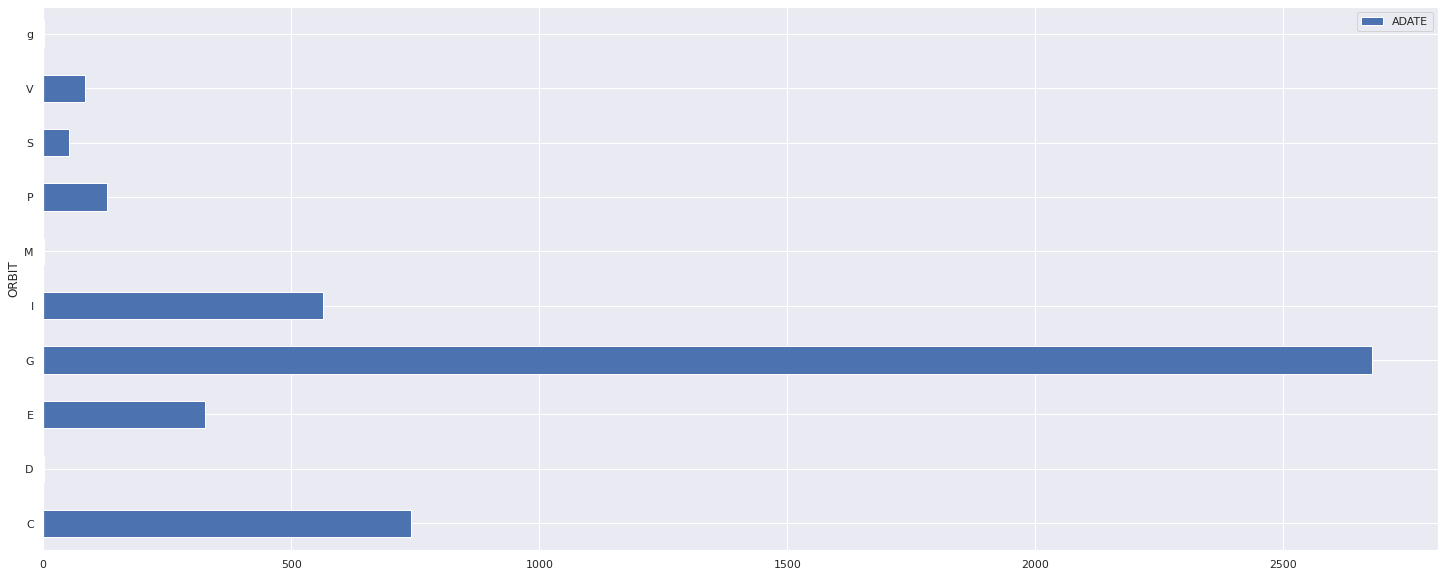

In [190]:
sns.set(rc={"figure.figsize":(25,10)})


anomaliesOrbit.plot(kind="barh")


In [191]:
anomaliesO=df_orbit.groupby([df_orbit.ADATE.dt.month, "ORBIT"]).agg({"BIRD": "count"}).reset_index().rename(columns={"BIRD":"TOTAL"})
anomaliesO

,ADATE,ORBIT,TOTAL
0,1,C,38
1,1,E,2
2,1,G,164
3,1,I,73
4,1,P,6
...,...,...,...
76,12,E,3
77,12,G,155
78,12,I,24
79,12,P,5


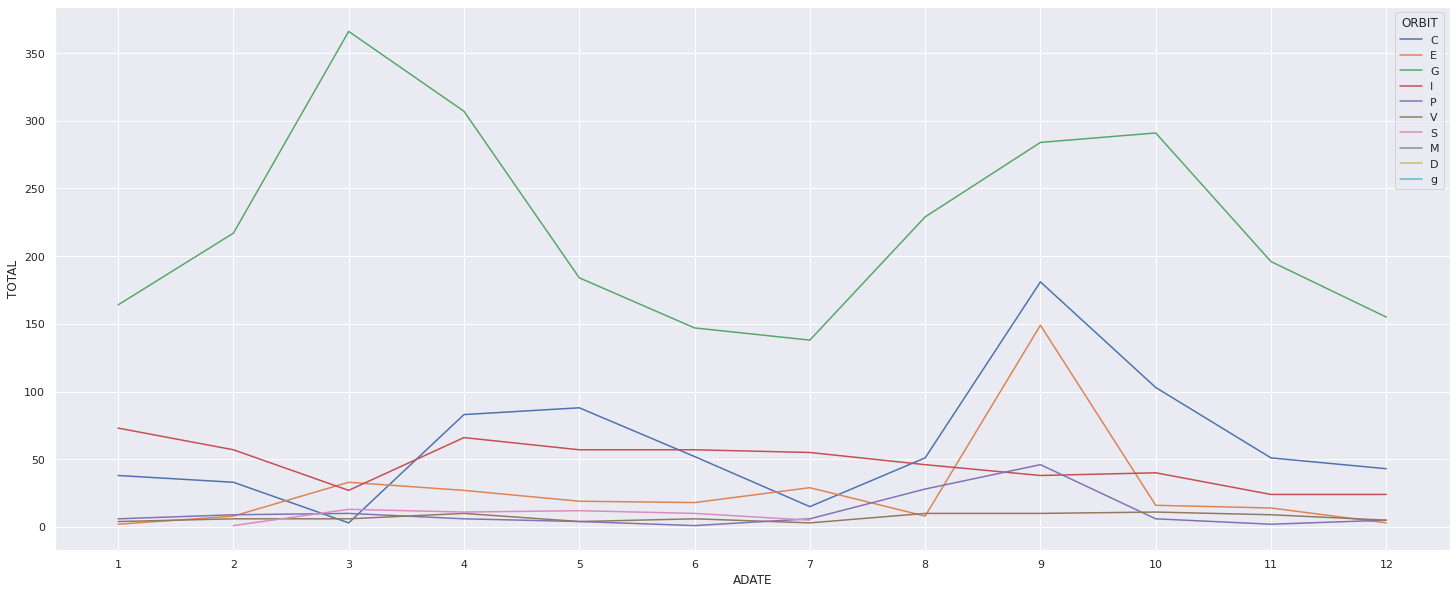

In [192]:
sns.set(rc={"figure.figsize":(25,10)})
ax=sns.lineplot(data=anomaliesO, x="ADATE", y="TOTAL", hue="ORBIT")
ax.set(xticks=anomaliesO.ADATE.unique())
plt.show()

### Anomalias por año

In [193]:
df_minY=df_min.groupby([df_min.ADATE.dt.year]).agg({"BIRD": "count"}).reset_index().rename(columns={"BIRD":"TOTAL"})
df_minY

,ADATE,TOTAL
0,1963,1
1,1966,2
2,1967,1
3,1968,2
4,1969,2
5,1970,3
6,1971,7
7,1972,5
8,1973,18
9,1974,101


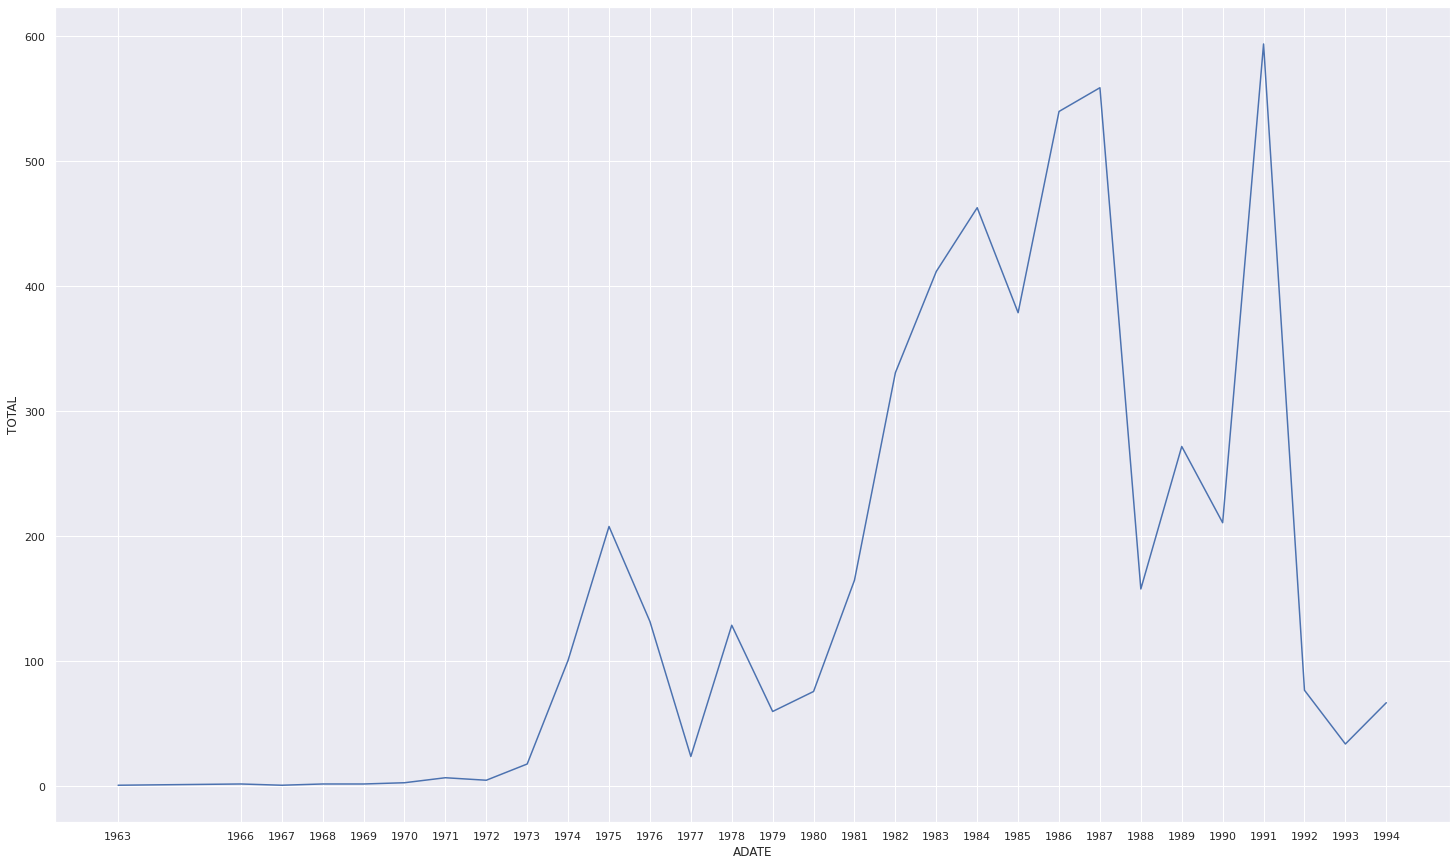

In [194]:
sns.set(rc={"figure.figsize":(25,15)})
ax=sns.lineplot(data=df_minY, x="ADATE", y="TOTAL")
ax.set(xticks=df_minY.ADATE.unique())
plt.show()